In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("datasets/GOOG.csv",parse_dates=["Date"],index_col=[0])
df=df.iloc[:,:-1]
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086
...,...,...,...,...,...
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-05-23,2202.080078,2240.110107,2183.084961,2233.330078,2233.330078
2022-05-24,2127.550049,2127.899902,2044.160034,2118.520020,2118.520020
2022-05-25,2102.840088,2130.894043,2084.225098,2116.790039,2116.790039
2022-05-26,2121.010010,2179.104980,2109.760010,2165.919922,2165.919922
2022-05-27,2195.770020,2257.360107,2191.000000,2255.979980,2255.979980


In [4]:
df.shape

(4476, 5)

In [5]:
test_split=round(len(df)*0.20)
print(test_split)


895


In [6]:
df_for_training=df[:-895]
df_for_testing=df[-895:]
print(df_for_training.shape)
print(df_for_testing.shape)

(3581, 5)
(895, 5)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        1.34908021e-04],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        3.39307537e-03],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        3.83867225e-03],
       ...,
       [8.38513750e-01, 8.43922922e-01, 8.38156069e-01, 8.27215513e-01,
        8.27215513e-01],
       [8.23181293e-01, 8.23889563e-01, 8.10375965e-01, 8.12689536e-01,
        8.12689536e-01],
       [8.10476525e-01, 8.28692499e-01, 8.24386693e-01, 8.25590596e-01,
        8.25590596e-01]])

In [8]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [9]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (3551, 30, 5)
trainY Shape--  (3551,)


In [10]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[3.30298164e-04 9.44785459e-04 0.00000000e+00 1.34908021e-04
  1.34908021e-04]
 [7.42148227e-04 2.98909923e-03 1.88269054e-03 3.39307537e-03
  3.39307537e-03]
 [4.71386886e-03 4.78092896e-03 5.42828241e-03 3.83867225e-03
  3.83867225e-03]
 [4.91367646e-03 4.01532941e-03 3.15578542e-03 1.98679178e-03
  1.98679178e-03]
 [2.35285614e-03 2.54928676e-03 3.28434064e-03 2.44873974e-03
  2.44873974e-03]
 [2.34877785e-03 2.52892558e-03 3.60779701e-03 3.22955376e-03
  3.22955376e-03]
 [3.63326671e-03 2.80177162e-03 4.03492722e-03 2.51005881e-03
  2.51005881e-03]
 [2.48334262e-03 1.52712947e-03 2.50886935e-03 8.17608079e-04
  8.17608079e-04]
 [1.26817570e-03 8.02253103e-04 2.57107531e-03 9.64778600e-04
  9.64778600e-04]
 [1.43128522e-03 5.00900100e-04 1.53849690e-03 9.81131336e-05
  9.81131336e-05]
 [0.00000000e+00 2.56557750e-04 1.23577446e-03 6.13207085e-04
  6.13207085e-04]
 [7.17681757e-04 0.00000000e+00 1.39335520e-03 0.00000000e+00
  0.00000000e+00]
 [7.42148227e-04 1.0587961

In [34]:
def build_model(optimizer,layers):
    grid_model = Sequential()
    grid_model.add(LSTM(128,return_sequences=True,input_shape=(30,5)))
    for i in range(layers):
        if i == layers-1:
            grid_model.add(LSTM(128))
        else:
            grid_model.add(LSTM(128, return_sequences=True))
            grid_model.add(Dropout(0.2))
#     grid_model.add(LSTM(50))
     
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'],
             "layers":[2,3,4]}

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)


<ipython-input-34-76c09eaaaa0a>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [35]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
111/111 [==============================] - 14s 85ms/step - loss: 0.0079 - val_loss: 0.1402
Epoch 2/8
111/111 [==============================] - 8s 72ms/step - loss: 5.9998e-04 - val_loss: 0.0979
Epoch 3/8
111/111 [==============================] - 8s 73ms/step - loss: 7.5439e-04 - val_loss: 0.1033
Epoch 4/8
111/111 [==============================] - 8s 75ms/step - loss: 7.3215e-04 - val_loss: 0.0932
Epoch 5/8
111/111 [==============================] - 8s 73ms/step - loss: 6.3659e-04 - val_loss: 0.1127
Epoch 6/8
111/111 [==============================] - 9s 85ms/step - loss: 6.6358e-04 - val_loss: 0.0913
Epoch 7/8
111/111 [==============================] - 8s 72ms/step - loss: 5.9968e-04 - val_loss: 0.0680
Epoch 8/8
111/111 [==============================] - 4s 24ms/step - loss: 9.3413e-05
Epoch 1/8
111/111 [==============================] - 14s 79ms/step - loss: 6.4993e-04 - val_loss: 0.3410
Epoch 2/8
111/111 [==============================] - 8s 76ms/step - loss: 1.0964e-04 

111/111 [==============================] - 16s 89ms/step - loss: 9.1818e-04 - val_loss: 0.4886
Epoch 2/10
111/111 [==============================] - 9s 85ms/step - loss: 1.8148e-04 - val_loss: 0.4521
Epoch 3/10
111/111 [==============================] - 10s 89ms/step - loss: 1.4682e-04 - val_loss: 0.3281
Epoch 4/10
111/111 [==============================] - 10s 88ms/step - loss: 1.3718e-04 - val_loss: 0.2856
Epoch 5/10
111/111 [==============================] - 10s 89ms/step - loss: 1.0751e-04 - val_loss: 0.3538
Epoch 6/10
111/111 [==============================] - 9s 83ms/step - loss: 1.0273e-04 - val_loss: 0.2522
Epoch 7/10
111/111 [==============================] - 9s 80ms/step - loss: 1.0509e-04 - val_loss: 0.1829
Epoch 8/10
111/111 [==============================] - 9s 79ms/step - loss: 7.6927e-05 - val_loss: 0.2043
Epoch 9/10
111/111 [==============================] - 9s 79ms/step - loss: 9.1841e-05 - val_loss: 0.2234
Epoch 10/10
111/111 [==============================] - 2s 18ms

Epoch 8/8
89/89 [==============================] - 3s 30ms/step - loss: 0.0055
Epoch 1/8
89/89 [==============================] - 21s 144ms/step - loss: 0.2764 - val_loss: 2.2229
Epoch 2/8
89/89 [==============================] - 11s 122ms/step - loss: 0.2455 - val_loss: 2.0452
Epoch 3/8
89/89 [==============================] - 11s 126ms/step - loss: 0.2118 - val_loss: 1.8450
Epoch 4/8
89/89 [==============================] - 11s 129ms/step - loss: 0.1750 - val_loss: 1.6176
Epoch 5/8
89/89 [==============================] - 11s 127ms/step - loss: 0.1333 - val_loss: 1.3646
Epoch 6/8
89/89 [==============================] - 11s 127ms/step - loss: 0.0909 - val_loss: 1.1041
Epoch 7/8
89/89 [==============================] - 11s 127ms/step - loss: 0.0531 - val_loss: 0.8700
Epoch 8/8
89/89 [==============================] - 3s 29ms/step - loss: 0.0016
Epoch 1/8
89/89 [==============================] - 21s 142ms/step - loss: 0.0228 - val_loss: 2.4100
Epoch 2/8
89/89 [=========================

In [40]:
my_model=grid_search.best_estimator_.model


In [41]:
prediction=my_model.predict(testX)


In [42]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.8419275 ]
 [0.83457804]
 [0.82578754]
 [0.8233206 ]
 [0.82664216]
 [0.83356047]
 [0.8404546 ]
 [0.8457295 ]
 [0.8473226 ]
 [0.8505267 ]
 [0.85554194]
 [0.8614876 ]
 [0.86673594]
 [0.8694681 ]
 [0.86882854]
 [0.8649063 ]
 [0.86293507]
 [0.8645569 ]
 [0.8684014 ]
 [0.8742809 ]
 [0.87707067]
 [0.8772869 ]
 [0.8760071 ]
 [0.8764514 ]
 [0.8759502 ]
 [0.87379694]
 [0.87363327]
 [0.8785461 ]
 [0.8857455 ]
 [0.89439154]
 [0.9037272 ]
 [0.9095861 ]
 [0.9090314 ]
 [0.90443206]
 [0.8992362 ]
 [0.89768696]
 [0.8994615 ]
 [0.9023565 ]
 [0.90483963]
 [0.90640974]
 [0.9069669 ]
 [0.9051355 ]
 [0.9031929 ]
 [0.90239275]
 [0.90261006]
 [0.90345526]
 [0.90523684]
 [0.90950656]
 [0.9156612 ]
 [0.9232447 ]
 [0.93014836]
 [0.9333359 ]
 [0.9328214 ]
 [0.93417096]
 [0.93972576]
 [0.9472548 ]
 [0.95327973]
 [0.9569231 ]
 [0.9582064 ]
 [0.95962393]
 [0.96383166]
 [0.9702766 ]
 [0.9746604 ]
 [0.97472227]
 [0.9715941 ]
 [0.96591973]
 [0.9594232 ]
 [0.95465195]
 [0.9544586 ]
 [0.95780194]
 [0.9635

In [43]:
scaler.inverse_transform(prediction)


ValueError: non-broadcastable output operand with shape (865,1) doesn't match the broadcast shape (865,5)

In [44]:
prediction_copies_array = np.repeat(prediction,5, axis=-1)


In [45]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),5)))[:,0]


In [46]:
pred

array([1077.9003, 1068.9221, 1058.1837, 1055.1702, 1059.2278, 1067.6791,
       1076.1008, 1082.5447, 1084.4907, 1088.4049, 1094.5315, 1101.7947,
       1108.2059, 1111.5435, 1110.7622, 1105.9708, 1103.5629, 1105.5441,
       1110.2405, 1117.4229, 1120.8307, 1121.0948, 1119.5315, 1120.0742,
       1119.462 , 1116.8315, 1116.6316, 1122.6332, 1131.4279, 1141.9897,
       1153.394 , 1160.5513, 1159.8737, 1154.2551, 1147.908 , 1146.0154,
       1148.1831, 1151.7196, 1154.753 , 1156.671 , 1157.3517, 1155.1145,
       1152.7413, 1151.7639, 1152.0294, 1153.0619, 1155.2383, 1160.4541,
       1167.9725, 1177.2365, 1185.6699, 1189.5638, 1188.9353, 1190.5839,
       1197.3696, 1206.5669, 1213.927 , 1218.3777, 1219.9453, 1221.677 ,
       1226.8171, 1234.6902, 1240.0454, 1240.121 , 1236.2997, 1229.3679,
       1221.4318, 1215.6033, 1215.3671, 1219.4513, 1226.5142, 1234.5582,
       1240.9745, 1244.3938, 1244.4451, 1243.3923, 1242.6505, 1244.0693,
       1247.0543, 1251.3636, 1256.8828, 1262.2842, 

In [47]:
original_copies_array = np.repeat(testY,5, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),5)))[:,0]

In [48]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1077.9003 1068.9221 1058.1837 1055.1702 1059.2278 1067.6791 1076.1008
 1082.5447 1084.4907 1088.4049 1094.5315 1101.7947 1108.2059 1111.5435
 1110.7622 1105.9708 1103.5629 1105.5441 1110.2405 1117.4229 1120.8307
 1121.0948 1119.5315 1120.0742 1119.462  1116.8315 1116.6316 1122.6332
 1131.4279 1141.9897 1153.394  1160.5513 1159.8737 1154.2551 1147.908
 1146.0154 1148.1831 1151.7196 1154.753  1156.671  1157.3517 1155.1145
 1152.7413 1151.7639 1152.0294 1153.0619 1155.2383 1160.4541 1167.9725
 1177.2365 1185.6699 1189.5638 1188.9353 1190.5839 1197.3696 1206.5669
 1213.927  1218.3777 1219.9453 1221.677  1226.8171 1234.6902 1240.0454
 1240.121  1236.2997 1229.3679 1221.4318 1215.6033 1215.3671 1219.4513
 1226.5142 1234.5582 1240.9745 1244.3938 1244.4451 1243.3923 1242.6505
 1244.0693 1247.0543 1251.3636 1256.8828 1262.2842 1267.4845 1274.2303
 1280.2683 1285.1248 1289.6461 1295.227  1285.3015 1266.4962 1245.7361
 1231.3657 1224.1376 1220.9949 1219.4725 1217.6747 1216.0342 12

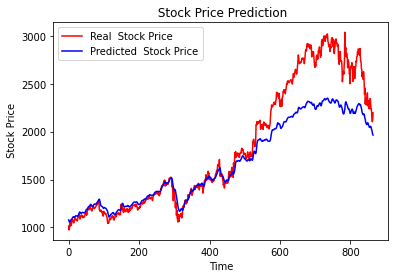

In [56]:
#plt.xlim([100,500])
plt.plot(original, color = 'red', label = 'Real  Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()